# Data Science for Business - Assignment 1
# Data Visualisation & Price Prediction: Nissan All Models Price Prediction Dataset

### Name Last_Name

References:

1- Dataset for predicting price of nissan models based on performance & conditions: [Nissan All Models Price Prediction Dataset](https://www.kaggle.com/datasets/marius2303/nissan-all-models-price-prediction-dataset)  

### **Business Description**
This assignment is designed to offer insights into the characteristics of Nissan vehicles and their owners, including demographic details, vehicle performance, and market valuation. It is valuable for analyses related to car ownership trends, pricing strategies, and consumer preferences in the automotive sector.

### 1 Importing dataset and preprocessing
 - Import the training dataset in Google Colab and show a few lines of it.
 - Check if the dataset has missing values. If yes, please drop the corresponding row by using function *data_name.dropna()*.
 - Show the indicators that have numerical values and the indicators that have string values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/var/folders/9z/jvyz2w6d2v1bbg_kkfnms6m00000gn/T/ipykernel_6934/3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Assignment_1-Train.csv')
df.head()

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,Rnessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22


In [3]:
print('Number of missed values in each indicator:')
df.isna().sum()

Number of missed values in each indicator:


id               0
full_name      667
age            670
gender         680
model          694
color          685
performance    681
km             683
condition      673
price          665
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
print('Types of each indicator:')
df.dtypes

Types of each indicator:


id               int64
full_name       object
age            float64
gender          object
model           object
color           object
performance    float64
km             float64
condition       object
price          float64
dtype: object

In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print('Numerical Columns:', numerical_columns)

string_columns = df.select_dtypes(include=['object']).columns.tolist()
print('String Columns:', string_columns)

Numerical Columns: ['id', 'age', 'performance', 'km', 'price']
String Columns: ['full_name', 'gender', 'model', 'color', 'condition']


### 2 Analysing models and conditions
 - Show the mean price for each model and condition.
 - Is the mean price higher for better conditions compared to worse conditions?
 - Show the price distribution for each model using histograms.

In [7]:
mean_price_by_model = df.groupby('model')['price'].mean().reset_index()
mean_price_by_model.rename(columns={'price': 'mean price'}, inplace=True)
mean_price_by_model.head(10)

,model,mean price
0,370Z,25538.741818
1,AD,28444.326000
2,Almera,24646.028125
3,Altima,26926.668192
4,Armada,31129.522941
5,Avenir,28050.458061
6,Bluebird,28711.374000
7,Bluebird Sylphy,28170.429167
8,Cabstar / Atlas,37817.786667
9,Caravan / Urvan,31206.795714


In [8]:
mean_price_by_cond = df.groupby('condition')['price'].mean().reset_index()
mean_price_by_cond.rename(columns={'price': 'mean price'}, inplace=True)
mean_price_by_cond.sort_values('mean price', inplace=True)
mean_price_by_cond

,condition,mean price
3,old,26876.202410
4,very bad,27359.183254
0,bad,27397.123650
5,very good,27542.236519
2,new,27815.745957
1,good,31728.429556


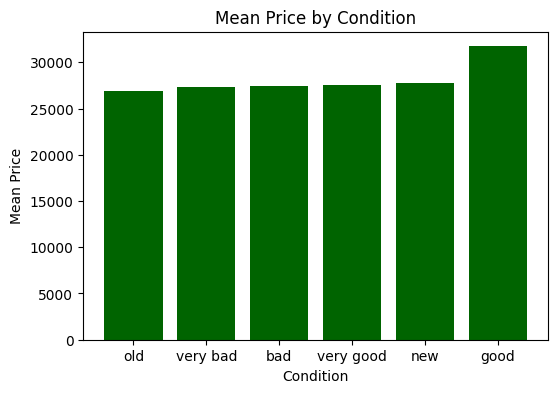

In [9]:
plt.figure(figsize=(6, 4))
plt.bar(mean_price_by_cond['condition'], mean_price_by_cond['mean price'], color='darkgreen')
plt.xlabel('Condition')
plt.ylabel('Mean Price')
plt.title('Mean Price by Condition')
plt.show()

There is a clear trend indicating that the mean price increases as the condition improves. However, it is notable that vehicles in `good` condition exhibit higher mean prices than those categorized as `very good` or `new.` Additionally, all other conditions, except for the `good` cars, have roughly similar mean prices. The histogram indicates a slight peak in mean prices for vehicles in `good` condition.

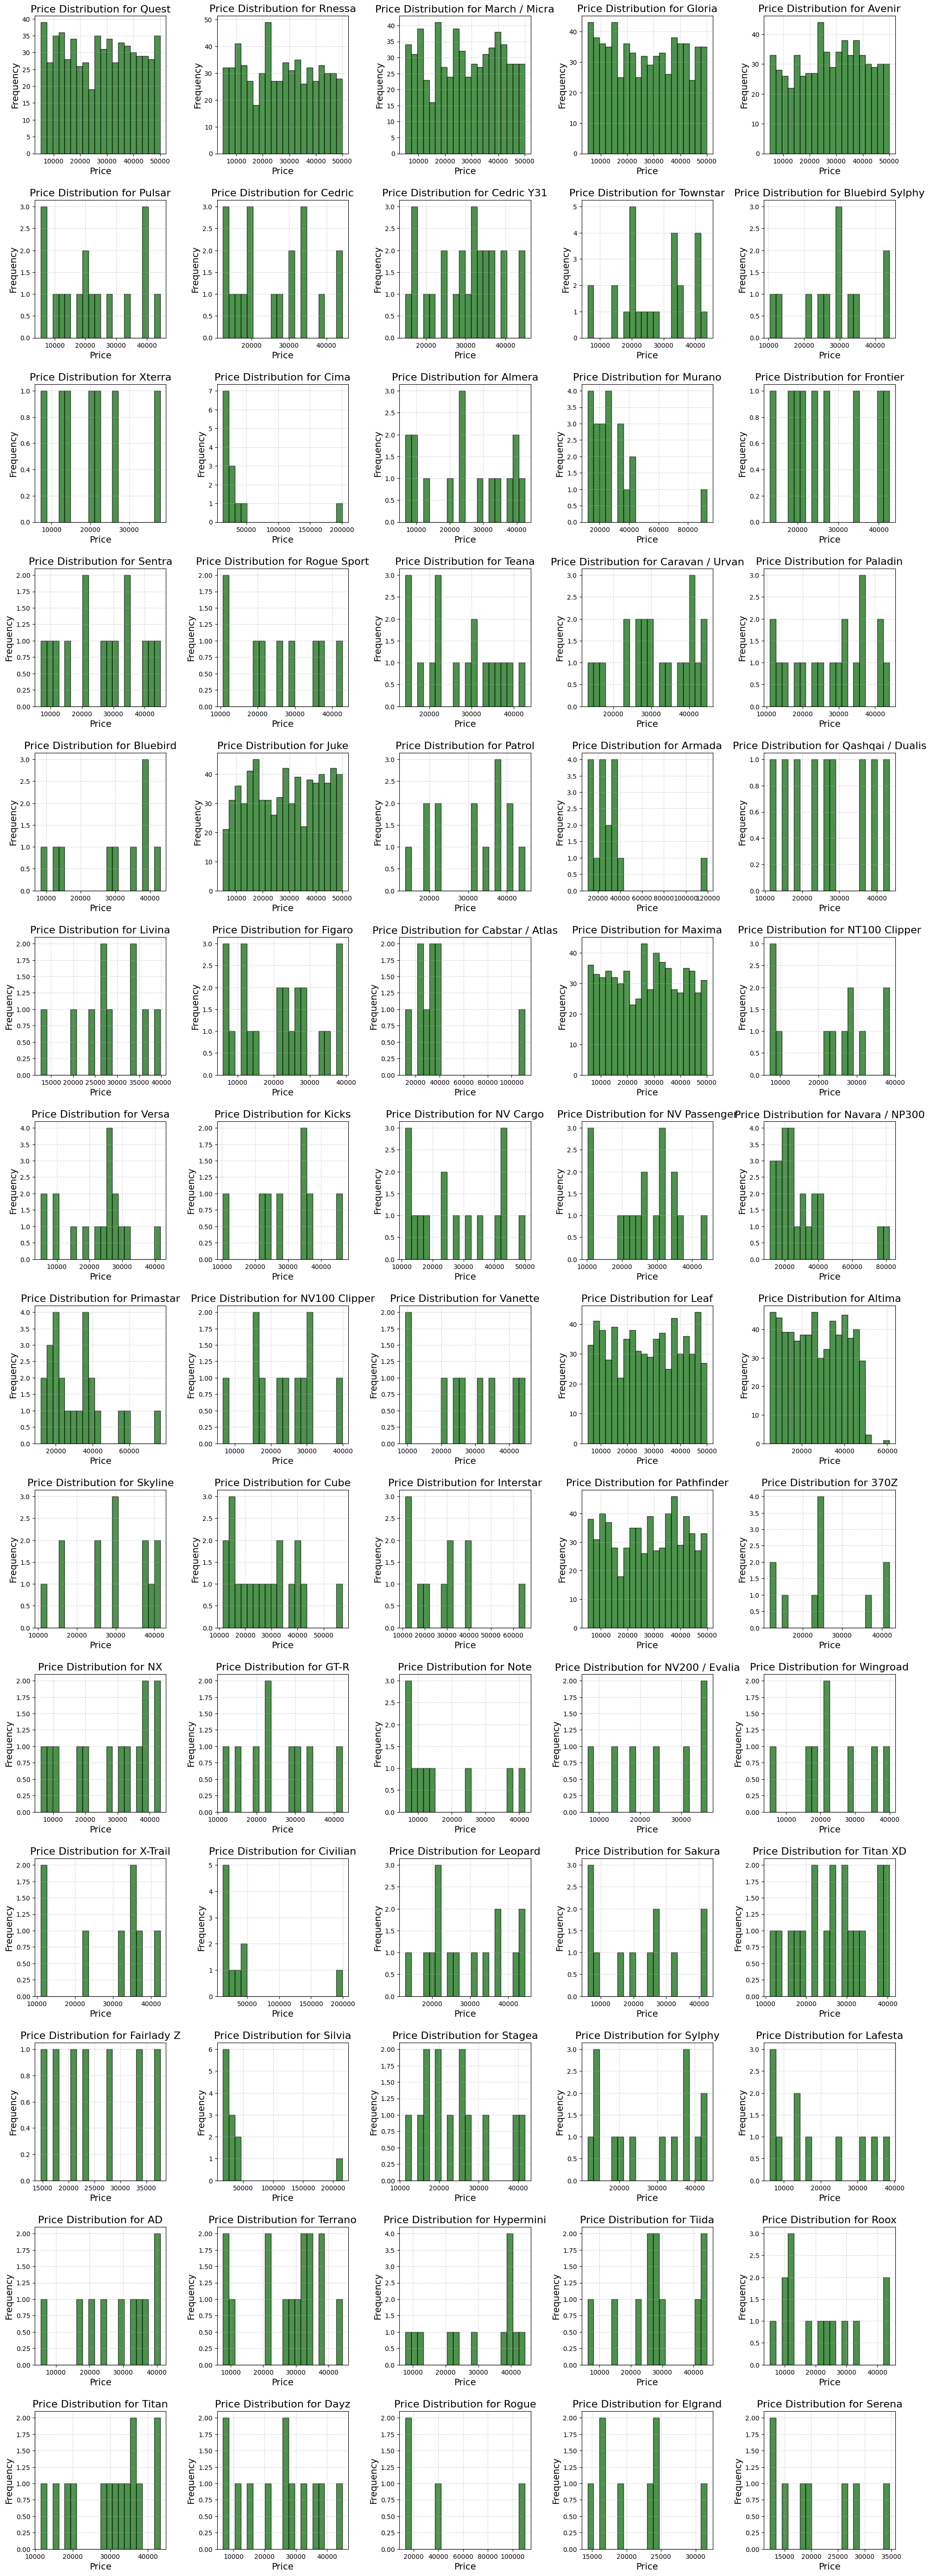

In [10]:
models = df['model'].unique()
num_models = len(models)
num_cols = 5
num_rows = (num_models // num_cols) + (num_models % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

for i, model in enumerate(models):
    model_data = df[df['model'] == model]['price'].dropna()
    
    axes[i].hist(model_data, bins=20, color='darkgreen', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Price Distribution for {model}', fontsize=16)
    axes[i].set_xlabel('Price', fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(pad=2.0)
plt.show()

### 3 The effect of color
 - Calculate the mean price for different colors.
 - Considering this data, which colors of used cars should we avoid buying?

In [11]:
mean_price_by_color = df.groupby('color')['price'].mean().reset_index()
mean_price_by_color.rename(columns={'price': 'mean price'}, inplace=True)
mean_price_by_color.sort_values('mean price', inplace=True)
mean_price_by_color.head()

,color,mean price
10,Maroon,24290.295333
4,Fuscia,24919.112245
14,Puce,26652.228889
22,Yellow,26720.263551
2,Blue,26751.111378


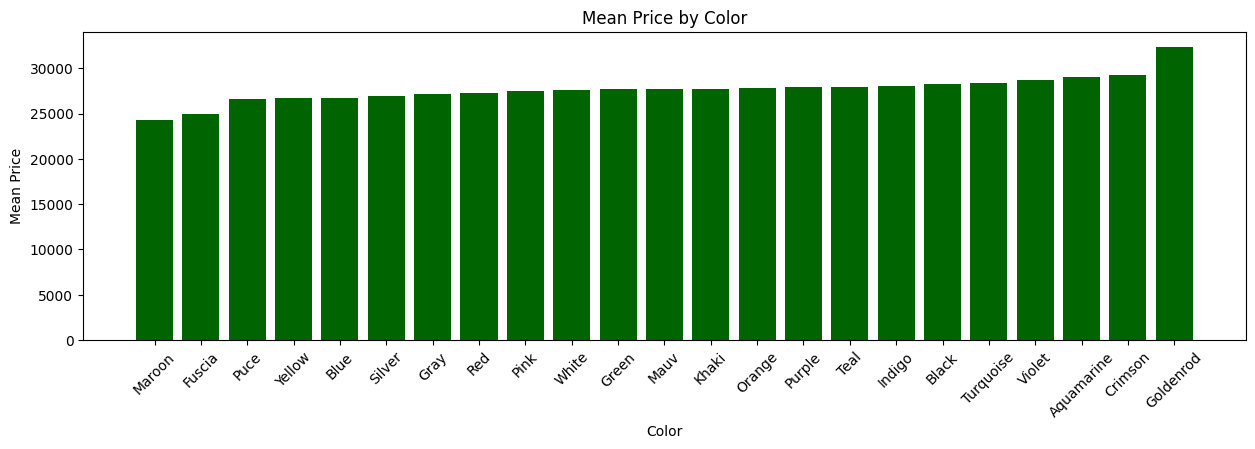

In [12]:
plt.figure(figsize=(15, 4))
plt.bar(mean_price_by_color['color'], mean_price_by_color['mean price'], color='darkgreen')
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')
plt.xticks(rotation=45)
plt.show()

Based on the analysis of the data, the most expensive color for all cars is identified as `Coldenrod`. Therefore, if we define `colors to avoid purchasing` as those associated with higher costs, `Coldenrod` would be the color to avoid. Conversely, the color deemed most appealing is `Maroon`.

In [13]:
used_cars = df[df['condition'] != 'new']

mean_price_by_color = used_cars.groupby('color')['price'].mean().reset_index()
mean_price_by_color.rename(columns={'price': 'mean price'}, inplace=True)
mean_price_by_color.sort_values('mean price', inplace=True)
mean_price_by_color.head()

,color,mean price
10,Maroon,24291.681136
4,Fuscia,25065.290000
0,Aquamarine,25374.469600
2,Blue,26378.284318
14,Puce,26652.228889


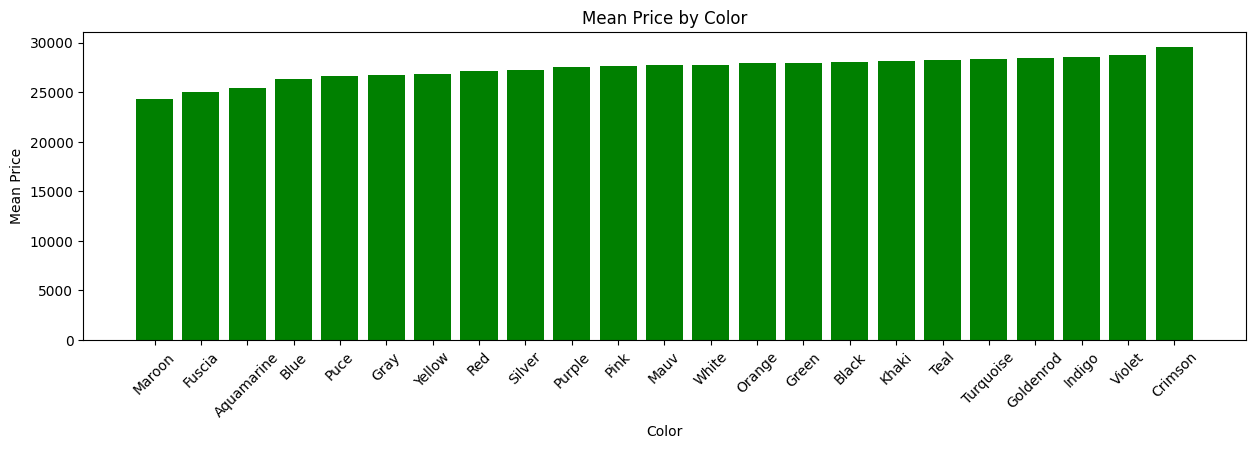

In [14]:
plt.figure(figsize=(15, 4))
plt.bar(mean_price_by_color['color'], mean_price_by_color['mean price'], color='green')
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')
plt.xticks(rotation=45)
plt.show()

However, when focusing exclusively on used cars, excluding those classified as `new`, it is advisable to avoid purchasing vehicles in the color `Crimson`.

### 4 The effect of gender and condition
 - Analyze the effect of gender on pricing and use appropriate visualisation.
 - Analyze the effect of condition on pricing and use appropriate visualisation.

In [15]:
mean_price_by_gender = df.groupby('gender')['price'].mean().reset_index()
mean_price_by_gender.rename(columns={'price': 'mean price'}, inplace=True)
mean_price_by_gender.sort_values('mean price', inplace=True)
mean_price_by_gender.head()

,gender,mean price
4,Genderqueer,21827.704091
1,Bigender,22529.371429
2,Female,27083.309459
6,Non-binary,27213.704360
7,Polygender,27362.184410


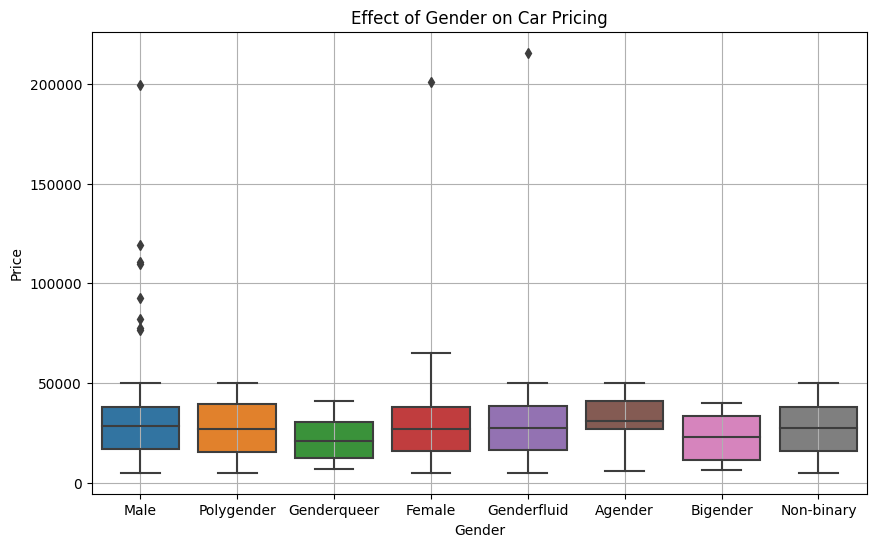

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='price', data=df)
plt.title('Effect of Gender on Car Pricing')
plt.xlabel('Gender')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The plot shows that gender has a relatively minor impact on car pricing, with most gender categories displaying similar median prices and interquartile ranges. However, the `Female` category stands out with a higher upper quantile, indicating that women tend to pay more at the higher end of the price range compared to other genders. The `Female` category also has an outlier, suggesting that some women paid significantly more than the typical range. Similarly, the `Male` and `Genderfluid` categories exhibit notable outliers, showing that individuals in these groups also experienced higher price extremes. Overall, while the average car prices across genders are fairly consistent, certain groups — especially females — show greater variability at the higher price levels.

In [17]:
mean_price_by_cond.head()

,condition,mean price
3,old,26876.202410
4,very bad,27359.183254
0,bad,27397.123650
5,very good,27542.236519
2,new,27815.745957


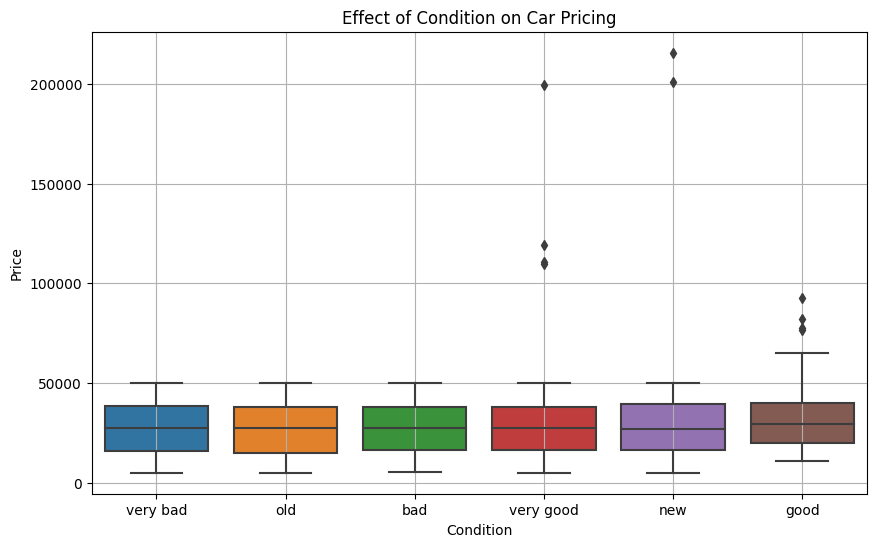

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Effect of Condition on Car Pricing')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The plot illustrates the impact of car condition on pricing, showing that while conditions like `very bad,` `old,` `bad,` and `very good` have similar median prices, cars in `new` and `good` condition have noticeably higher medians, indicating they tend to be priced higher. The `good` condition category also stands out with a larger interquartile range, suggesting more variability in prices compared to other conditions. Additionally, the `good,` `new,` and `very good` categories have multiple outliers, particularly `good,` where some cars are priced significantly higher than the typical range. Overall, the condition of the car affects the price, with better condition cars generally costing more and showing greater price variability.

### 5 Advanced Feature Engineering
Create advanced features from the existing data (e.g., usage years based on km and age, vehicle condition based on the owner's age) and analyze their impact on price prediction.

The first advanced feature is the `vehicle's condition based on the owner's age`. It is assumed that older individuals tend to maintain their vehicles better than younger owners. Therefore, based on the distribution of age, quantiles are used to classify the vehicle's condition into three categories: 'bad', 'average', and 'good'.

In [19]:
q25 = df['age'].quantile(0.25)
q75 = df['age'].quantile(0.75)

df['condition by owner age'] = df['age'].apply(lambda age: 'bad' if age < q25 else ('good' if age > q75 else 'average'))

mean_price_by_vehicle_cond = df.groupby('condition by owner age')['price'].mean().reset_index()
mean_price_by_vehicle_cond.rename(columns={'price': 'mean price'}, inplace=True)
mean_price_by_vehicle_cond.sort_values('mean price', inplace=True)
mean_price_by_vehicle_cond.head()

,condition by owner age,mean price
1,bad,27237.675612
0,average,27409.341584
2,good,27716.690880


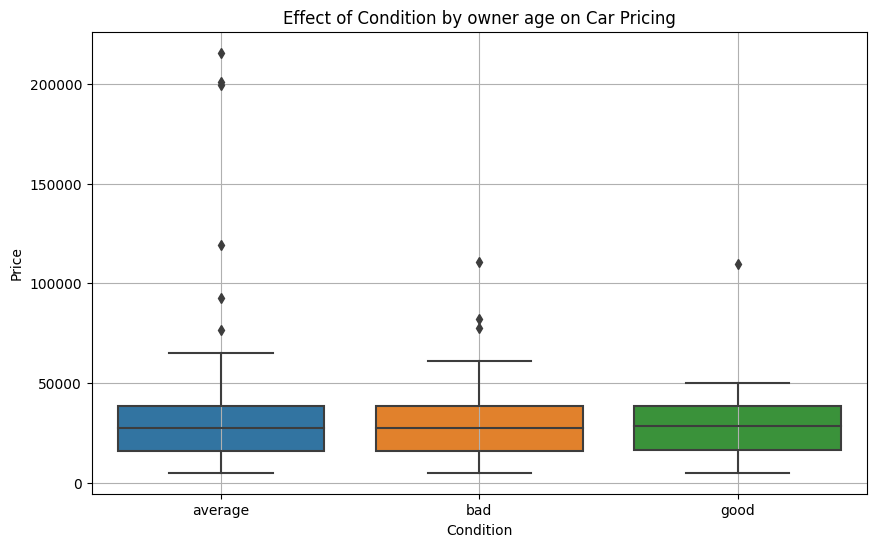

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition by owner age', y='price', data=df)
plt.title('Effect of Condition by owner age on Car Pricing')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The plot shows that vehicles in `good` condition tend to have a slightly higher median price than those in `average` or `bad` condition, although the spread of prices in each category is fairly similar. However, outliers are present in all conditions, with some vehicles in the `average` and `bad` categories showing extremely high prices, suggesting that factors beyond just condition might influence these outlier prices.

The second advanced feature is `usage years`, which is calculated based on the assumption that, on average, individuals drive approximately 20,000 kilometers per year (according to data sourced from Google). 

In [21]:
km_per_year = 20000
df['usage years'] = np.round(df['km'] / km_per_year, 2)

mean_price_by_usage_years = df.groupby('usage years')['price'].mean().reset_index()
mean_price_by_usage_years.rename(columns={'price': 'mean price'}, inplace=True)
mean_price_by_usage_years.sort_values('mean price', inplace=True)
mean_price_by_usage_years.tail()

,usage years,mean price
3633,47.92,62476.385
1,0.09,73972.940
3021,39.93,77970.140
1744,23.14,129307.100
704,9.54,199503.740


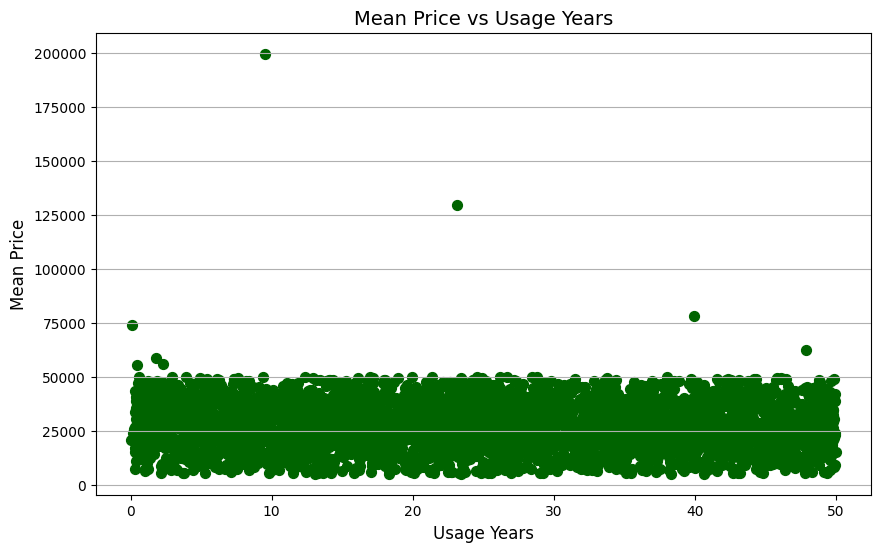

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_price_by_usage_years['usage years'], mean_price_by_usage_years['mean price'], color='darkgreen', s=50)
plt.title('Mean Price vs Usage Years', fontsize=14)
plt.xlabel('Usage Years', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.grid(True, axis='y')
plt.show()

The chart shows that vehicle prices remain relatively stable across most `usage years`, with mean prices typically ranging between 25,000 and 50,000. However, sharp price spikes around the 10, 20, and 40-year marks suggest the presence of outliers or high-value vehicles that significantly affect the overall trend. 

*The assumption of 20,000 km per year as the average annual usage significantly impacts the accuracy of the results by influencing the estimated `usage years` for each vehicle. If the actual mileage driven varies widely from this assumption, the calculated usage years could either overestimate or underestimate a vehicle's true age, leading to skewed pricing insights.

In [23]:
df['performance per km'] = df['performance'] / df['km']

mean_price_by_performance_per_km = df.groupby('performance per km')['price'].mean().reset_index()
mean_price_by_performance_per_km.rename(columns={'price': 'mean price'}, inplace=True)
mean_price_by_performance_per_km.sort_values('mean price', inplace=True)
mean_price_by_performance_per_km.tail()

,performance per km,mean price
2344,0.000255,110893.34
7190,0.139040,119125.76
6217,0.001347,199503.74
3666,0.000401,200801.85
5248,0.000713,215674.78


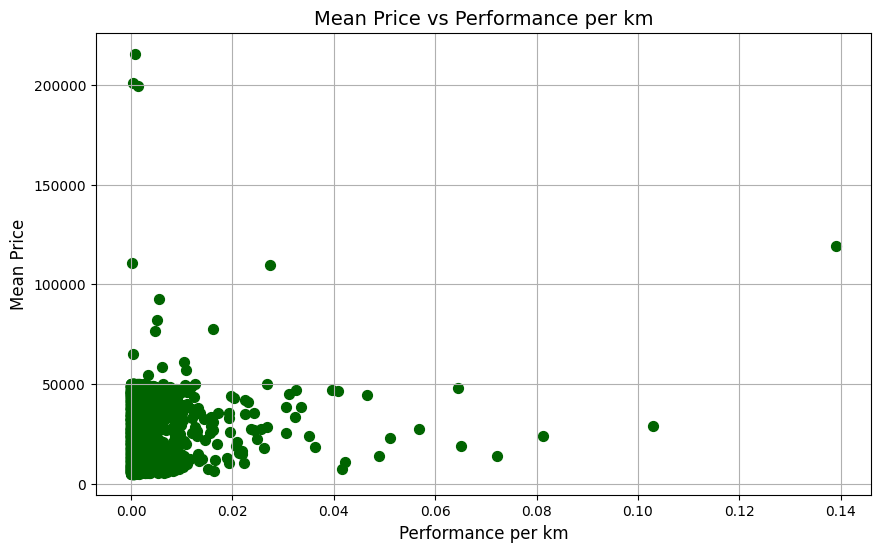

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_price_by_performance_per_km['performance per km'], mean_price_by_performance_per_km['mean price'], color='darkgreen', s=50)
plt.title('Mean Price vs Performance per km', fontsize=14)
plt.xlabel('Performance per km', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.grid(True)
plt.show()

The scatter plot shows a concentration of vehicles with lower **`performance per km`** (close to 0), which tend to have a wide range of mean prices, from very low to around 50,000, with a few outliers above 200,000. As **`performance per km`** increases, the number of vehicles decreases, and prices generally remain lower, except for a few outliers. This suggests that vehicles with higher **`performance per km`** are less common, and price does not consistently increase with higher performance efficiency.

### 6 Fitting the model
 - Fit continous classifiers on the training set and test them on the testing set.
    * LinearRegression
    * DecisionTreeRegressor
    * RandomForestRegressor
    * GradientBoostingRegressor
    * MLPRegressor
 - Which one provides a better accuracy? Why?



In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

train_data = pd.read_csv('Assignment_1-Train.csv')
test_data = pd.read_csv('Assignment_1-Test.csv')

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [26]:
categorical_columns = ['gender', 'model', 'color', 'condition']

mappings = {col: {val: idx+1 for idx, val in enumerate(train_data[col].unique())} for col in categorical_columns}

for col in categorical_columns:
    train_data[col] = train_data[col].map(mappings[col])
    test_data[col] = test_data[col].map(mappings[col])

In [27]:
X_train = train_data.drop(columns=['id','full_name','price'])  
y_train = train_data['price']

X_test = test_data.drop(columns=['id','full_name','price'])  
y_test = test_data['price']

In [28]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'MLP Regressor': MLPRegressor(max_iter=500, random_state=42)
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    score = model.score(X_test, y_test)

    
    return mse, r2, score

results = {}

for model_name, model in models.items():
    mse, r2, _ = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {'MSE': mse, 'R² Score': r2}
    print(f"{model_name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    #print(f"Accuracy: {score}")
    print("-" * 40)

results_df = pd.DataFrame(results).T
print("\nComparison of all models:")
print(results_df)

best_model_name = results_df['R² Score'].idxmax()
best_model_instance = models[best_model_name]

Linear Regression:
Mean Squared Error: 174632980.21525705
R-squared Score: -0.0025728820411563547
----------------------------------------
Decision Tree Regressor:
Mean Squared Error: 354785016.9562031
R-squared Score: -1.036830823801775
----------------------------------------
Random Forest Regressor:
Mean Squared Error: 184016206.28819084
R-squared Score: -0.05644224849867885
----------------------------------------
Gradient Boosting Regressor:
Mean Squared Error: 175028353.24322248
R-squared Score: -0.00484272978492184
----------------------------------------
MLP Regressor:
Mean Squared Error: 214236355.22822577
R-squared Score: -0.22993697888224007
----------------------------------------

Comparison of all models:
                                      MSE  R² Score
Linear Regression            1.746330e+08 -0.002573
Decision Tree Regressor      3.547850e+08 -1.036831
Random Forest Regressor      1.840162e+08 -0.056442
Gradient Boosting Regressor  1.750284e+08 -0.004843
MLP Regress

Currently, all models are performing poorly. Based on the results shown in the table:

**`Linear Regression`** and **`Gradient Boosting Regressor`** have the lowest MSE and R² closest to 0, which is slightly better than the others, but still not performing well overall.

### 7 Finding the most effective indicators
 - Use SHAP values to the model that provides highest accuracy and show the indicator that has the most impact on the price.
 - Does higher values of this indicator result in higher price?

In [29]:
#!pip install shap

ExactExplainer explainer: 1825it [00:14, 39.59it/s]                           


SHAP Values for Linear Regression


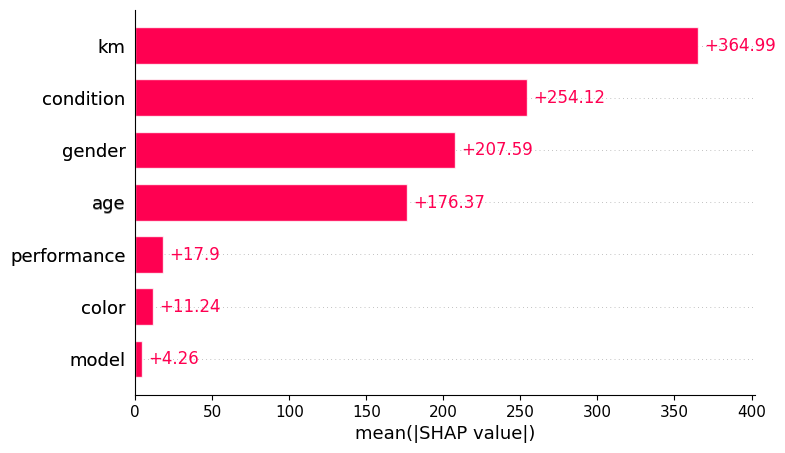

In [30]:
import shap

best_model_instance.fit(X_train, y_train)

y_pred = best_model_instance.predict(X_test)

explainer = shap.Explainer(best_model_instance.predict, X_train)
rf_shap_values = explainer(X_test)

print(f"SHAP Values for {best_model_name}")

shap.plots.bar(rf_shap_values)

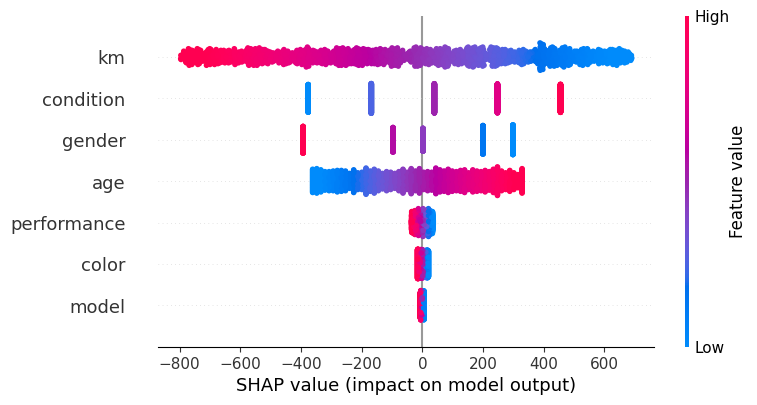

In [31]:
shap.plots.beeswarm(rf_shap_values)

This SHAP summary plot visualizes the impact of each feature on the model's predictions. Features like `km` and `condition` have the largest influence, with `km` primarily having negative SHAP values, indicating that higher kilometers reduce the predicted price. 

### 8 Interpretability with LIME
- Use LIME (Local Interpretable Model-agnostic Explanations) to interpret the predictions of your model and understand which features are most influential for specific predictions.
- What is the difference between the SHAP and LIME methods?

In [32]:
#!pip install lime

Your answer here

### 9 Ensemble Learning
- Implement an ensemble learning method (e.g., Stacking or Voting) based on multiple models (e.g., RandomForestRegressor, GradientBoostingRegressor, and LinearRegression) and compare the performance of the ensemble model with individual models.
- Can you improve the result of voting method? Please implement your ideas.

In [33]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from xgboost import XGBRegressor

In [34]:
Your code here

SyntaxError: invalid syntax (1835382560.py, line 1)

In [ ]:
Your code here

In [ ]:
Your code/answer here